## Import Libraries

In [68]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

## Load the Data

In [69]:
df = pd.read_csv("D:/final_data.csv")

In [70]:
df.shape

(10754, 22)

In [71]:
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [72]:
# uniqeness
#df.drop_duplicates(inplace=True)
df[df.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [73]:
# Completeness
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [74]:
# Accurecy types
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [75]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['team', 'position']
numeric_features = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'highest_value','position_encoded', 'winger']

In [76]:
for i in categorical_features:
    print(df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64


In [77]:
for i in numeric_features:
    print(df[i].value_counts())

height
180.000000    744
185.000000    608
175.000000    596
178.000000    594
183.000000    572
188.000000    493
184.000000    458
182.000000    449
181.240353    440
186.000000    423
187.000000    419
176.000000    390
177.000000    372
190.000000    371
173.000000    366
179.000000    359
181.000000    355
170.000000    312
191.000000    272
174.000000    270
189.000000    255
172.000000    254
192.000000    203
193.000000    181
171.000000    169
168.000000    124
194.000000    117
169.000000    107
195.000000     98
167.000000     85
196.000000     68
166.000000     44
165.000000     42
197.000000     31
198.000000     24
163.000000     16
160.000000     15
164.000000     14
199.000000     12
200.000000     12
202.000000      6
162.000000      6
161.000000      3
206.000000      2
204.000000      1
156.000000      1
159.000000      1
Name: count, dtype: int64
age
22.000000    841
23.000000    823
26.000000    812
25.000000    772
24.000000    767
21.000000    715
28.000000    67

In [10]:
#df = df[df['Year']>=2000]

In [11]:
# Calculate the frequency of each 'Type'
#type_counts = df['Type'].value_counts()

# Filter 'Type' values that appear 10 or more times
#df = df[df['Type'].isin(type_counts[type_counts >= 2].index)]

In [78]:
df.shape

(10754, 22)

In [13]:
# # Calculate the frequency of each 'Make'
# make_counts = df['Make'].value_counts()

# # Filter 'Type' values that appear 10 or more times
# df = df[df['Make'].isin(make_counts[make_counts >=2].index)]

In [79]:
df.shape

(10754, 22)

In [15]:
#df[df['Type']=='Other']

In [19]:
#plt.figure(figsize=(15,8))
#plt.boxplot(df['Price']);
#plt.hist(df['Price'], bins=100);
#plt.hist(df[(df['Price']<=400000) & (df['Price']>=5000)]['Price'], bins=100);

In [80]:
# استخدام طريقة IQR لإزالة القيم الشاذة لكل عمود رقمي في df مباشرة
for column in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [81]:
df.shape

(4309, 22)

In [19]:
#df[df['Mileage']<1000]

In [2]:
#plt.figure(figsize=(15,8))
#plt.boxplot(df['Mileage']);
#plt.hist(df[df['Mileage']<=450000]['Mileage'], bins=100);
#plt.hist(df['Mileage'], bins=100);

In [23]:
#df = df[df['Mileage']<=450000]
#df.shape

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [82]:
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
8,/teden-mengi/profil/spieler/548470,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,...,0.0,0.0,2758,47,13,0,2000000,2000000,2,0
20,/zidane-iqbal/profil/spieler/686845,Manchester United,Zidane Iqbal,midfield-CentralMidfield,181.0,20.0,39,0.129125,0.064562,0.225968,...,0.0,0.0,2788,0,0,1,800000,800000,3,0


In [83]:
categorical_features

['team', 'position']

In [84]:
# تحويل الأعمدة الفئوية إلى تنسيق رقمي
df = pd.get_dummies(df,columns=categorical_features, drop_first=True)


In [85]:
df.shape

(4309, 388)

In [86]:
df.head(2)

,player,name,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
8,/teden-mengi/profil/spieler/548470,Teden Mengi,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False
20,/zidane-iqbal/profil/spieler/686845,Zidane Iqbal,181.0,20.0,39,0.129125,0.064562,0.225968,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False


#### 3. Feature selection

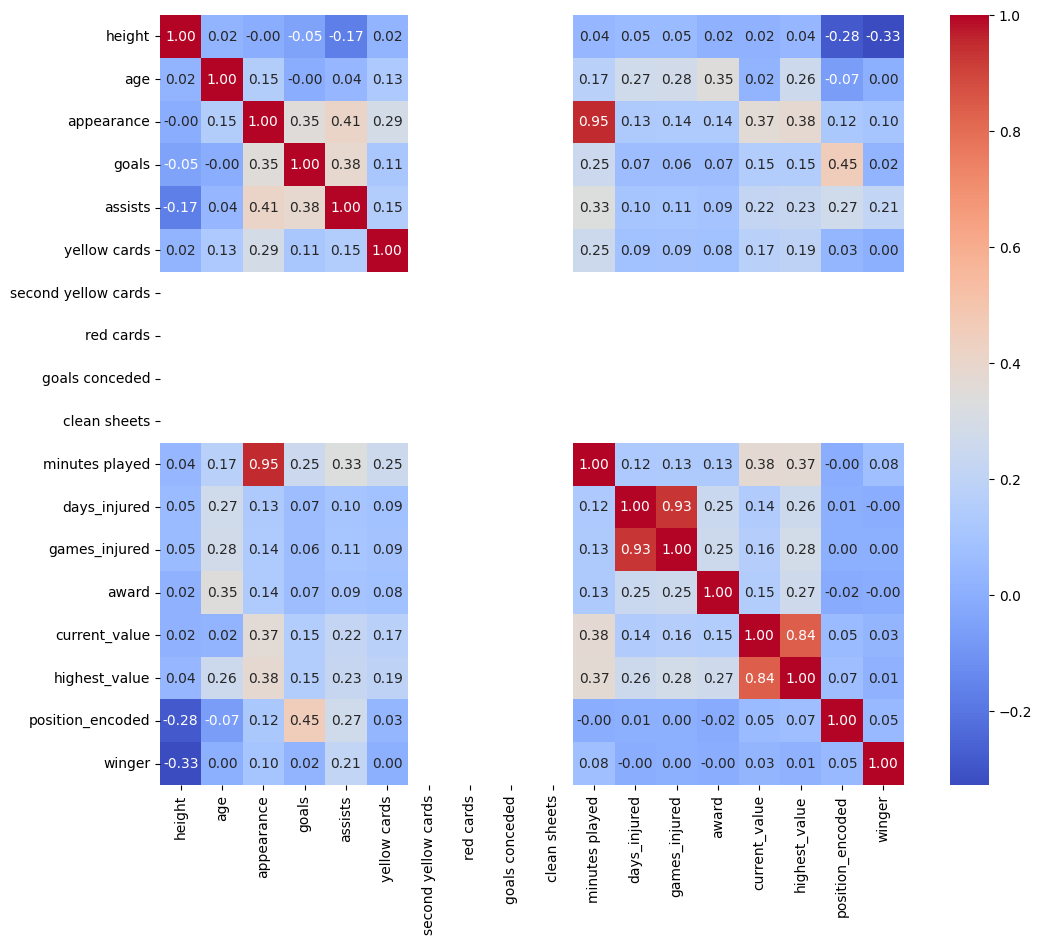

In [88]:
numeric_df = df.select_dtypes(include=[np.number])

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [90]:
# Select only numeric columns to avoid errors
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlations on the numeric subset
correlation = numeric_df.corr()

# Print the sorted correlation values for 'current_value'
print(correlation['current_value'].sort_values(ascending=False))


current_value          1.000000
highest_value          0.838045
minutes played         0.376086
appearance             0.366293
assists                0.218638
yellow cards           0.173770
games_injured          0.157054
award                  0.149069
goals                  0.147605
days_injured           0.140102
position_encoded       0.052226
winger                 0.027729
age                    0.020811
height                 0.019262
second yellow cards         NaN
red cards                   NaN
goals conceded              NaN
clean sheets                NaN
Name: current_value, dtype: float64


In [92]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'assists', 'minutes played', 'current_value',
       'highest_value'],
      dtype='object')

In [93]:
selected_features = ['appearance', 'assists', 'minutes played', 'current_value',
       'highest_value']

In [94]:
df = df[selected_features]
df.head()

,appearance,assists,minutes played,current_value,highest_value
8,34,0.000000,2758,2000000,2000000
20,39,0.064562,2788,800000,800000
21,51,0.102506,3512,800000,800000
113,46,0.276838,3251,200000,200000
118,38,0.074257,2424,500000,500000


#### 4. Prepare train and test data

In [96]:
# Define X and y without attempting to drop columns that don't exist in df
X = df.drop(columns=['current_value'])
y = df['current_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale only the selected numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [97]:
X.shape

(4309, 4)

## Buliding the Model

In [98]:
model = LinearRegression()

In [179]:
#ridge_model = Ridge()  # You can adjust alpha to see different resu

In [223]:
#lasso_model = Lasso()  # You can adjust alpha to see different results

In [100]:
# Define the parameter grid without 'normalize'
param_grid = {'fit_intercept': [True, False]}

# Initialize GridSearchCV with LinearRegression and the modified parameter grid
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_


## Train the Model

In [101]:
# Fit the best model on the training data
best_model.fit(X_train, y_train)


LinearRegression()

## Test the Model

In [113]:
# Predict and evaluate the model
y_pred = best_model.predict(X_test)

## Interpretation of the Model

In [47]:
# Display coefficients
#coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
#coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
#coefficients


In [103]:
print(best_model.intercept_) 

783912.0974760661


In [51]:
#coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
#coeff_df

## Evaluating the Model 

1. Mean Square Error

In [110]:
y_base = [y_train.mean()] * len(y_test)

In [105]:
mse = mean_squared_error(y_test, y_pred)

mse, grid_search.best_params_

(240891107906.32947, {'fit_intercept': True})

2. Mean Absolute Error

In [106]:
# our benchmark model
#mse_base = mean_absolute_error(y_test, y_base )
#print(f'Mean Absolute  Error of base model: {mse_base}')
mae = mean_absolute_error(y_test, y_pred)
mae

286650.9313237572

In [55]:
#mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
#mae_test = mean_absolute_error(y_test, y_pred)
#print(f'Mean Absolute Error for training: {mae_train}')
#print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 24397.66499302171
Mean Absolute Error for testing: 25186.715154450434


3. Root Mean Squared Error

In [107]:
# our benchmark model
#print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')
rmse = np.sqrt(mse)
rmse

490806.5891023973

In [62]:
#print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
#print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 35933.31837874458
Root Mean Squared Error for testing: 35930.687604550476


4. R Square

In [115]:
r2 = r2_score(y_test, y_pred)
r2

0.7098047051409242

#### Predictions vs. Real Values

In [117]:
#predictions = model.predict(X_test)
#predictions

In [118]:
#Real_Values = np.array(y_test)
#Real_Values

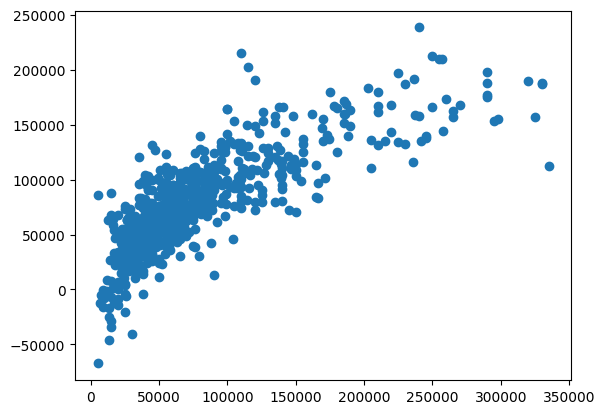

In [41]:
#plt.scatter(Real_Values,predictions); 

#### Residual Histogram

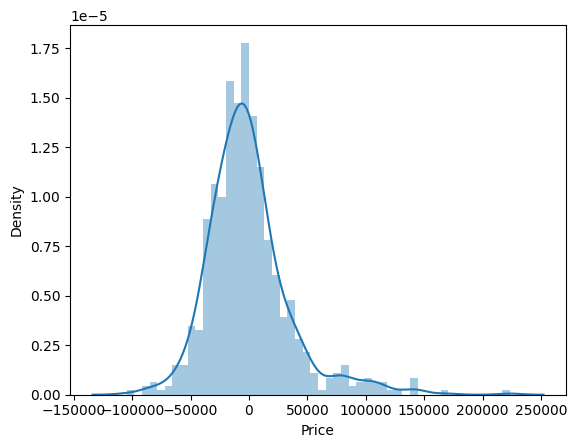

In [42]:
#sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution

In [120]:
# Initialize Ridge and Lasso models with default alpha values (regularization strength)
ridge_model = Ridge()
lasso_model = Lasso()

# Fit Ridge and Lasso models on the training data
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict on the test set for both models
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

# Evaluate Ridge model
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression Metrics:")
print("Mean Squared Error:", ridge_mse)
print("Mean Absolute Error:", ridge_mae)
print("Root Mean Squared Error:", ridge_rmse)
print("R-Squared:", ridge_r2)

# Evaluate Lasso model
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_pred)

print("\nLasso Regression Metrics:")
print("Mean Squared Error:", lasso_mse)
print("Mean Absolute Error:", lasso_mae)
print("Root Mean Squared Error:", lasso_rmse)
print("R-Squared:", lasso_r2)

Ridge Regression Metrics:
Mean Squared Error: 240877016626.49133
Mean Absolute Error: 286623.97463127074
Root Mean Squared Error: 490792.2336656228
R-Squared: 0.7098216805417312

Lasso Regression Metrics:
Mean Squared Error: 240890743356.1997
Mean Absolute Error: 286649.8730660591
Root Mean Squared Error: 490806.2177236549
R-Squared: 0.7098051443050482
